In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn import preprocessing

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [6]:
df.isna().sum()

Pregnancies    0
Glucose        0
Insulin        0
BMI            0
Pedigree       0
Age            0
Outcome        0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X=df.iloc[:, :df.shape[1]-1]       #Independent Variables
y=df.iloc[:, -1]                   #Dependent Variable
X.shape, y.shape

((768, 6), (768,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 27)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [12]:
y_pred = knn.predict(X_test)

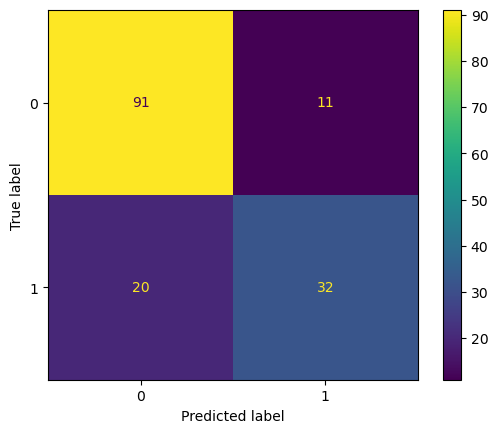

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       102
           1       0.74      0.62      0.67        52

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



In [17]:
from sklearn import metrics
knnn=KNeighborsClassifier(n_neighbors=27)
y_pred=knnn.fit(X_train, y_train).predict(X_test)
print(f"Accuracy for KNN model \t: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy for KNN model 	: 0.7987012987012987
